# Creating

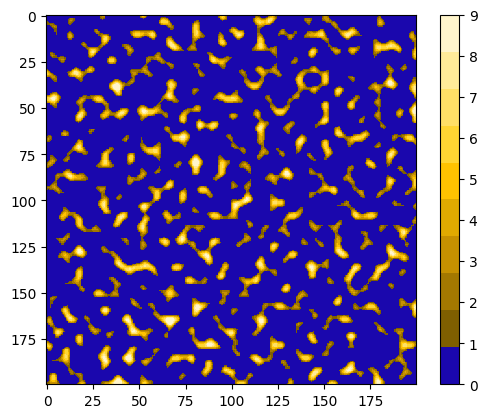

In [1]:
import noise
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def process_sections(arr, n):
    rows, cols = arr.shape

    for i in range(0, rows - (n - 1)):
        for j in range(0, cols - (n - 1)):
            section = arr[i:i+n, j:j+n]
            if (
                (np.all(section[0, :] == 0) or i == 0) and
                (np.all(section[-1, :] == 0) or i + n == rows) and
                (np.all(section[:, 0] == 0) or j == 0) and
                (np.all(section[:, -1] == 0) or j + n == cols) 
            ):
                 arr[i:i+n, j:j+n] = 0


shape = (200, 200)
scale = 7.0
octaves = 60
persistence = 1
lacunarity = 1.0
seed = 91
repeat = 1042

np.random.seed(seed)

world = np.zeros(shape)

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i / scale,j / scale,octaves=octaves,persistence=persistence,lacunarity=lacunarity,repeatx=repeat,repeaty=repeat,base=seed)

min_val = np.min(world)
max_val = np.max(world)
world = np.round(1 + 29 * (world - min_val) / (max_val - min_val))
world = np.maximum(0, world - 18)
world = np.minimum(9, world)

cmap = ListedColormap(['#1a07ad',"#7f5f00","#a37800","#c69100","#e0aa00","#ffc300","#ffd633","#ffe066","#ffeb99","#fff5cc"])

process_sections(world, 3)
process_sections(world, 4)
process_sections(world, 5)

plt.imshow(world, cmap=cmap, interpolation='antialiased')
plt.colorbar()
plt.savefig("fig.png")
plt.show()
np.savetxt('data.txt', world.astype(int), delimiter=',', fmt='%d')

world = world.astype(int).astype(str)
world = np.where(world == "0", " ", world)
np.savetxt('visual.txt', world, delimiter=',', fmt='%s')

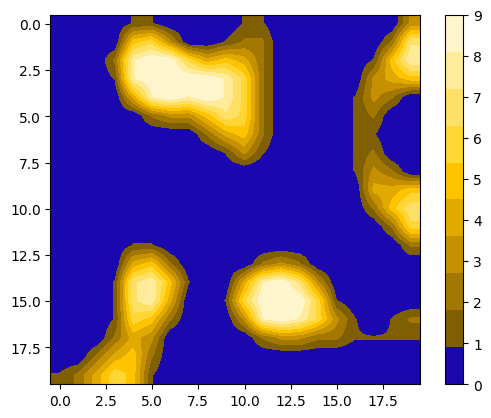

In [2]:
import noise
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def process_sections(arr, n):
    rows, cols = arr.shape

    for i in range(0, rows - (n - 1)):
        for j in range(0, cols - (n - 1)):
            section = arr[i:i+n, j:j+n]
            if (
                (np.all(section[0, :] == 0) or i == 0) and
                (np.all(section[-1, :] == 0) or i + n == rows) and
                (np.all(section[:, 0] == 0) or j == 0) and
                (np.all(section[:, -1] == 0) or j + n == cols) 
            ):
                 arr[i:i+n, j:j+n] = 0


shape = (20, 20)
scale = 6.0
octaves = 6
persistence = 3
lacunarity = 1
seed = 23
repeat = 1042

np.random.seed(seed)

world = np.zeros(shape)

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i / scale,j / scale,octaves=octaves,persistence=persistence,lacunarity=lacunarity,repeatx=repeat,repeaty=repeat,base=seed)

min_val = np.min(world)
max_val = np.max(world)
world = np.round(1 + 29 * (world - min_val) / (max_val - min_val))
world = np.maximum(0, world - 18)
world = np.minimum(9, world)

cmap = ListedColormap(['#1a07ad',"#7f5f00","#a37800","#c69100","#e0aa00","#ffc300","#ffd633","#ffe066","#ffeb99","#fff5cc"])

process_sections(world, 3)
process_sections(world, 4)
process_sections(world, 5)


plt.imshow(world, cmap=cmap, interpolation='bilinear')
plt.colorbar()
plt.savefig("testfig.png")
plt.show()
np.savetxt('testdata.txt', world.astype(int), delimiter=',', fmt='%d')

world = world.astype(int).astype(str)
world = np.where(world == "0", " ", world)
np.savetxt('testvisual.txt', world, delimiter=',', fmt='%s')

# SOLVING

In [9]:
import numpy as np

def dfs(grid, visited, i, j, school):
    if (
        i not in range(grid.shape[0]) 
        or j not in range(grid.shape[1]) 
        or visited[i, j] 
        or grid[i, j] == 0
    ):
        return

    visited[i, j] = True
    school.append((i, j))

    dfs(grid, visited, i - 1, j, school)
    dfs(grid, visited, i + 1, j, school)
    dfs(grid, visited, i, j - 1, school)
    dfs(grid, visited, i, j + 1, school)

def center_of_mass(school):
    print(school)
    total_mass = np.sum(grid[tuple(zip(*school))])
    mx = np.array([j * grid[i, j] for i, j in school], dtype=np.int16)
    my = np.array([i * grid[i, j] for i, j in school], dtype=np.int16)
    return (np.sum(my) // total_mass, np.sum(mx) // total_mass), total_mass

def find_schools():
    visited = np.zeros_like(grid, dtype=bool)
    schools = []

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] != 0 and not visited[i, j]:
                school = []
                dfs(grid, visited, i, j, school)
                schools.append(school)

    return schools


with open("testdata.txt") as f:
    grid = np.loadtxt(f, delimiter=',', dtype="int16")

result = []
for school in find_schools():
    center, total_mass = center_of_mass(school)
    result.append((total_mass, center))

print(result)
weights = 0
for w, pos in result:
    weights += w
    print(grid[pos])
print(weights)
max(result)

[(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 5), (5, 7), (4, 7), (3, 7), (2, 7), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (1, 10), (0, 10), (0, 11), (1, 11), (2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (7, 11), (7, 10), (6, 10), (5, 10), (4, 10), (3, 10), (2, 10), (7, 9), (3, 3), (2, 3)]
[(0, 19), (1, 19), (2, 19), (3, 19), (3, 18), (2, 18), (1, 18), (2, 17), (3, 17), (4, 17), (5, 17), (6, 17), (7, 17), (8, 17), (9, 17), (10, 17), (10, 18), (9, 18), (8, 18), (9, 19), (10, 19), (11, 19), (12, 19), (11, 18), (8, 16), (7, 16), (6, 16), (5, 16), (4, 16), (4, 18)]
[(12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (19, 3), (18, 3), (17, 3), (16, 3), (15, 3), (14, 3), (18, 2), (19, 2), (19, 1), (19, 0), (19, 5), (18, 5), (17, 5), (16, 5), (15, 5), (14, 5), (13, 5), (12, 5), (13, 6), (14, 6), (15, 6), (16, 6), (14, 7)]
[(13, 11), (14, 11), (15, 

(233, (3, 7))

In [8]:
with open("data.txt") as f:
    grid = np.loadtxt(f, delimiter=',', dtype="int8")

result = []
for school in find_schools():
    center, total_mass = center_of_mass(school)
    result.append((total_mass, center))

max(result)

(827, (136, 177))

In [372]:
dish = "GREEN SALAD"

# G,S = (5, (72, 84)), (7, (70, 82)), (1, (73,85))
# R,A = (15, (85, 68)), (12, (78, 61)), (3, (83, 66))
# E,L = (66, (60, 250)), (111, (0, 10)), (63, (200, 10))
# E,A = (18, (138, 220)), (27, (23, 50)), (53, (69, 20))
# N,D = (9, (100, 60)), (7, (40, 20)), (34, (80, 80))

list(zip(*[[ord(c) for c in word] for word in dish.split()]))

[(71, 83), (82, 65), (69, 76), (69, 65), (78, 68)]

In [381]:
for x in zip((71, 83), (82, 65), (69, 76), (69, 65), (78, 68)):
    print("".join(map(chr, x)))

GREEN
SALAD
